### 代码1
对数据进行基本的探索
返回缺失值个数以及最大最小值

In [1]:
import pandas as pd

datafile= 'air_data.csv'  # 航空原始数据,第一行为属性标签
resultfile = 'explore.csv'  # 数据探索结果表
# 读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile, encoding = 'utf-8')
# 包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）
explore = data.describe(percentiles = [], include = 'all').T  # T是转置，转置后更方便查阅
explore['null'] = len(data)-explore['count']  # describe()函数自动计算非空值数，需要手动计算空值数
explore = explore[['null', 'max', 'min']]
explore.columns = ['空值数', '最大值', '最小值']  # 表头重命名
print(explore)
# 这里只选取部分探索结果。
# describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、
# freq（最高频数）、mean（平均值）、std（方差）、min（最小值）、50%（中位数）、max（最大值）

                           空值数        最大值    最小值
MEMBER_NO                  0.0    62988.0    1.0
FFP_DATE                     0        NaN    NaN
FIRST_FLIGHT_DATE            0        NaN    NaN
GENDER                       3        NaN    NaN
FFP_TIER                   0.0        6.0    4.0
WORK_CITY                 2269        NaN    NaN
WORK_PROVINCE             3248        NaN    NaN
WORK_COUNTRY                26        NaN    NaN
AGE                      420.0      110.0    6.0
LOAD_TIME                    0        NaN    NaN
FLIGHT_COUNT               0.0      213.0    2.0
BP_SUM                     0.0   505308.0    0.0
EP_SUM_YR_1                0.0        0.0    0.0
EP_SUM_YR_2                0.0    74460.0    0.0
SUM_YR_1                 551.0   239560.0    0.0
SUM_YR_2                 138.0   234188.0    0.0
SEG_KM_SUM                 0.0   580717.0  368.0
WEIGHTED_SEG_KM            0.0  558440.14    0.0
LAST_FLIGHT_DATE             0        NaN    NaN
AVG_FLIGHT_COUNT    

## 代码2
对数据的分布分析

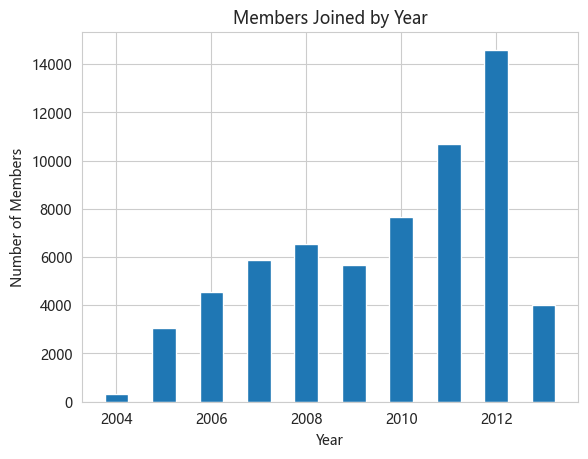

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
datafile= 'air_data.csv'  # 航空原始数据,第一行为属性标签

plt.rcParams['font.sans-serif'] = 'Microsoft Yahei' # 显示汉字：SimHei黑体，simsum宋体，Microsoft YaHei雅黑。根据系统安装的字体，有的能用有的不能用，我的是这三个可以。
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

# 读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile, encoding = 'utf-8')

# 客户信息类别
# 提取会员入会年份
from datetime import datetime
ffp = data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)
# 绘制各年份会员入会人数直方图
# 统计人数
ffp_year_count = ffp_year.value_counts()
# 绘制
plt.bar(ffp_year_count.index, ffp_year_count.values, width=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Number of Members')
plt.title('Members Joined by Year')
plt.show()


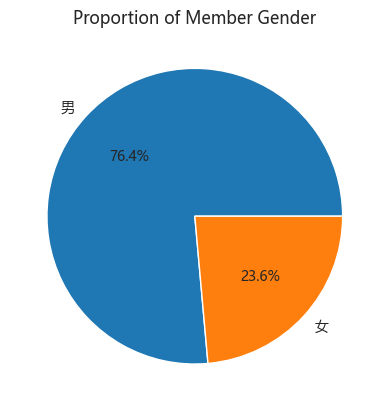

In [3]:
# 提取会员不同性别人数
gender_counts = data['GENDER'].value_counts()

# 绘制会员性别比例饼图
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Member Gender')
plt.show()


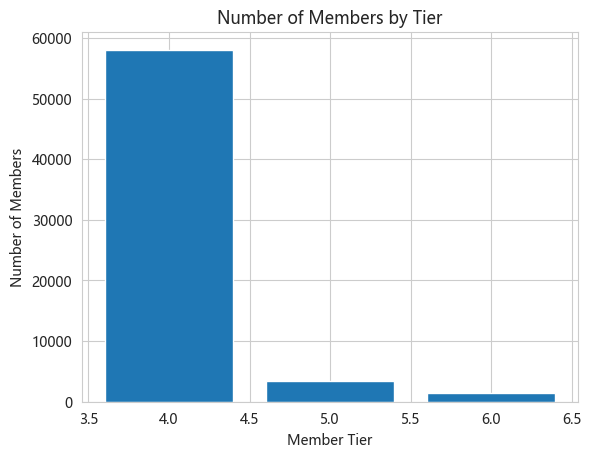

In [4]:
# 提取不同级别会员的人数
member_level = data['FFP_TIER'].value_counts()

# 绘制会员各级别人数条形图
plt.bar(member_level.index, member_level.values)
plt.title('Number of Members by Tier')
plt.xlabel('Member Tier')
plt.ylabel('Number of Members')
plt.show()


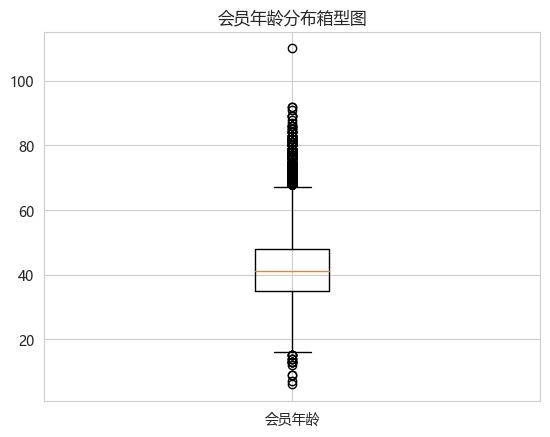

In [5]:
# 提取会员年龄
age = data['AGE'].dropna()

# 绘制会员年龄分布箱型图
plt.boxplot(age, labels=['会员年龄'])
plt.title('会员年龄分布箱型图')
plt.show()


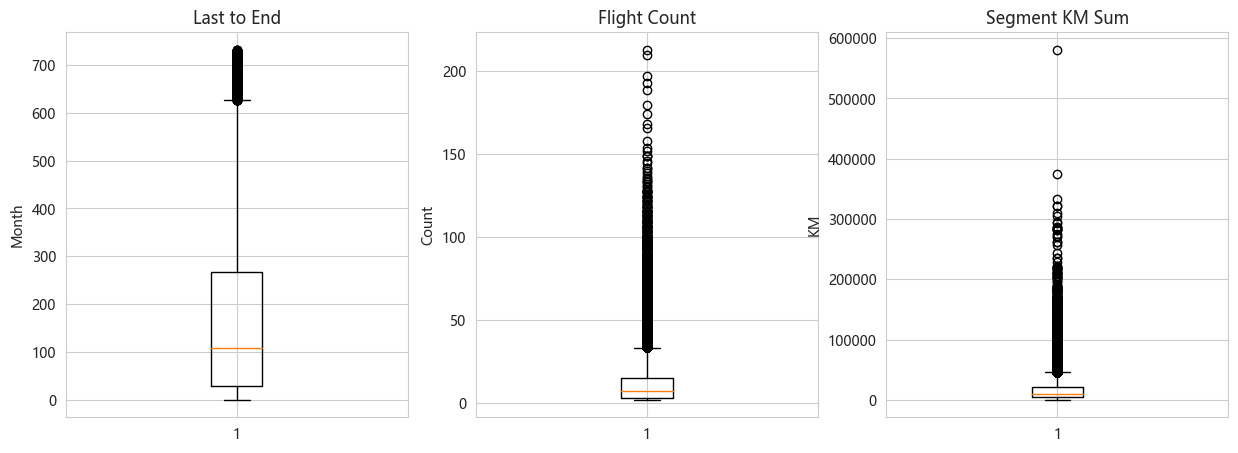

In [6]:
# 乘机信息类别
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']

# 绘制最后乘机至结束时长箱线图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].boxplot(lte.dropna())
axes[0].set_title('Last to End')
axes[0].set_ylabel('Month')

# 绘制客户飞行次数箱线图
axes[1].boxplot(fc.dropna())
axes[1].set_title('Flight Count')
axes[1].set_ylabel('Count')

# 绘制客户总飞行公里数箱线图
axes[2].boxplot(sks.dropna())
axes[2].set_title('Segment KM Sum')
axes[2].set_ylabel('KM')
plt.show()


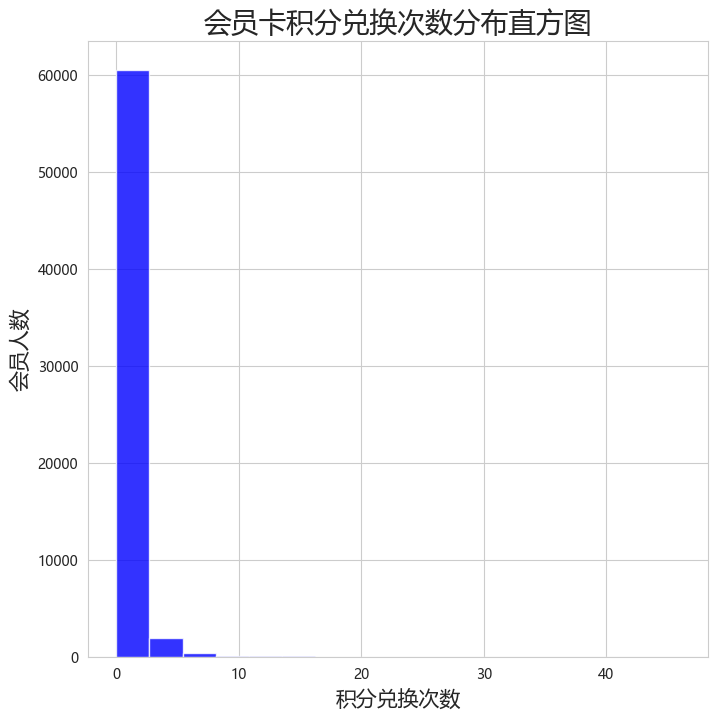

Text(0.5, 1.0, '会员总累计积分分布箱型图')

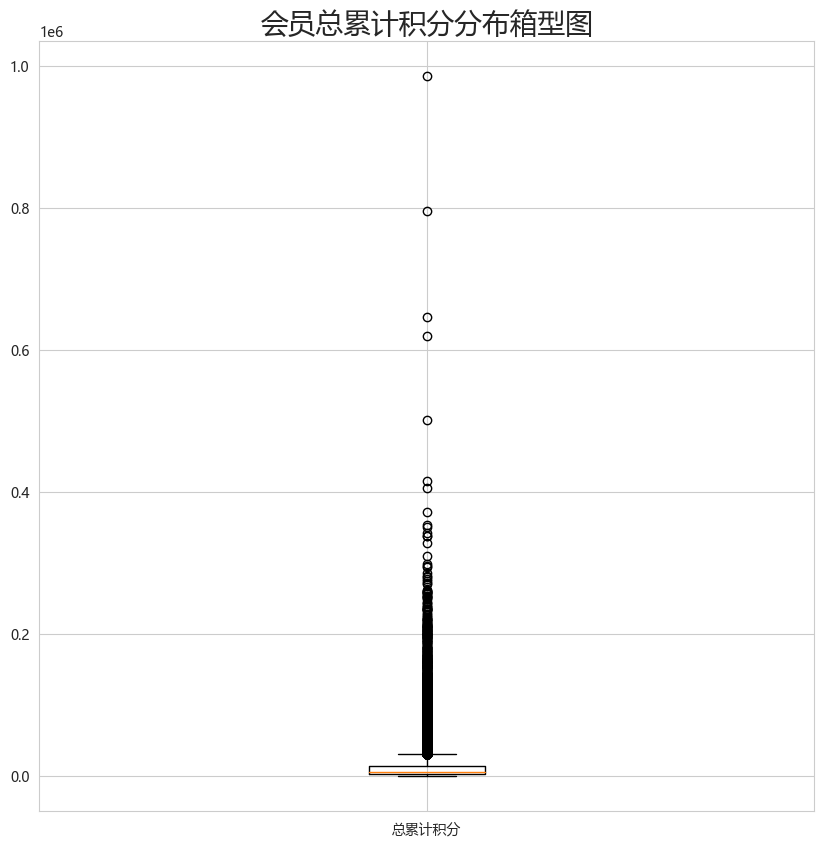

In [7]:
# 积分信息类别
# 提取会员积分兑换次数
exchange_count = data['EXCHANGE_COUNT']
# 统计积分兑换次数
exchange_count.value_counts()

# 绘制会员兑换积分次数直方图
plt.figure(figsize=(8,8))
plt.hist(exchange_count, bins='auto', color='b', alpha=0.8)
plt.xlabel('积分兑换次数', fontsize=15)
plt.ylabel('会员人数', fontsize=15)
plt.title('会员卡积分兑换次数分布直方图', fontsize=20)
plt.show()

# 提取会员总累计积分
point_sum = data['Points_Sum']
# 统计总累计积分
point_sum.value_counts()

# 绘制会员总累计积分箱线图
plt.figure(figsize=(10,10))
plt.boxplot(point_sum, labels=['总累计积分'])
plt.title('会员总累计积分分布箱型图', fontsize=20)


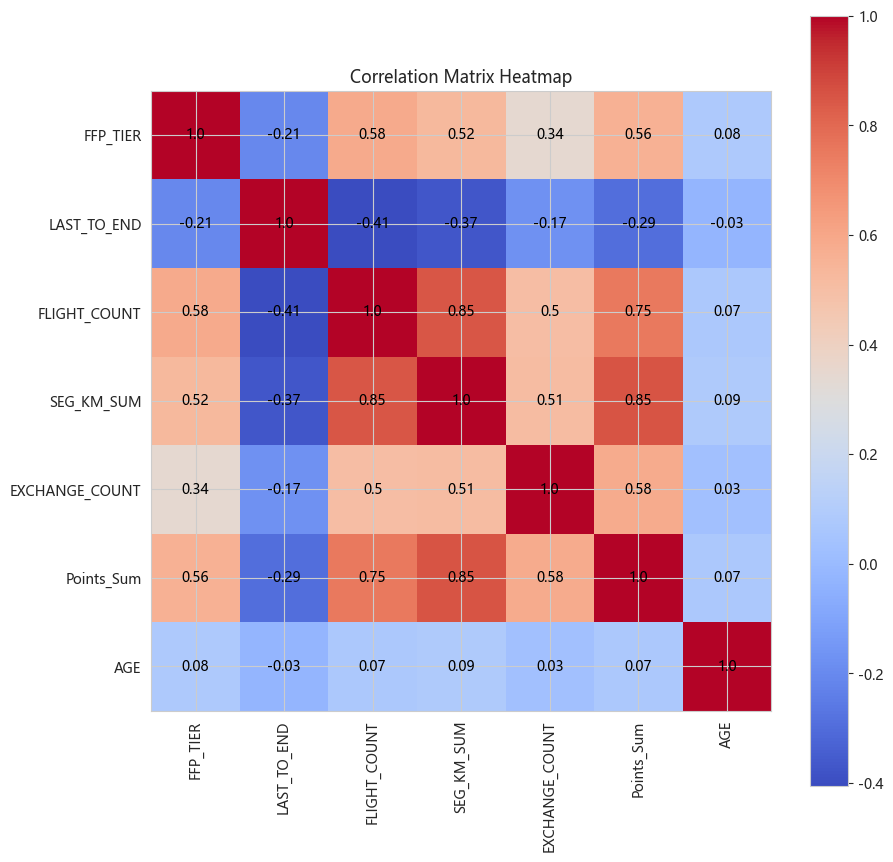

In [8]:
# 提取属性并合并为新数据集
data_corr = data[['FFP_TIER', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'Points_Sum', 'AGE']].dropna().astype(float)

# 计算相关性矩阵
corr_mat = data_corr.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr_mat, cmap='coolwarm')
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        text = ax.text(j, i, round(corr_mat.iloc[i, j],2), ha="center", va="center", color="black")
plt.title('Correlation Matrix Heatmap')
plt.colorbar(im)
plt.show()


### 代码3
处理缺失值与异常值

In [9]:
import numpy as np
import pandas as pd

# 读取数据
datafile = 'air_data.csv'
data = pd.read_csv(datafile, encoding='utf-8')

# 去除票价为空的记录
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]

# 只保留票价非零的，或者平均折扣率不为0且总飞行公里数大于0的记录
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] > 0) & (data['avg_discount'] != 0)
data = data[index1 | index2 | index3]

# 保存清洗后的数据
cleanedfile = 'air_data_cleaned.csv'
data.to_csv(cleanedfile, index=False, encoding='utf-8')
print(' done!')


 done!


### 代码4
属性选择、构造与数据标准化


In [10]:
import pandas as pd
import numpy as np

# 读取数据清洗后的数据
cleanedfile = 'air_data_cleaned.csv'  # 数据清洗后保存的文件路径
airline = pd.read_csv(cleanedfile, encoding = 'utf-8')
# 选取需求属性
airline_selection = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END',
                                     'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
print('筛选的属性前5行为：\n',airline_selection.head())
# 构造属性L
L = pd.to_datetime(airline_selection['LOAD_TIME']) - \
pd.to_datetime(airline_selection['FFP_DATE'])
L = L.astype('str').str.split().str[0]
L = L.astype('int')/30

# 合并属性
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis = 1)
airline_features.columns = ['L','R','F','M','C']
print('构建的LRFMC属性前5行为：\n',airline_features.head())

# 数据标准化
# import sklearn
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)
np.savez('./tmp/airline_scale.npz',data)
print('标准化后LRFMC五个属性为：\n',data[:5,:])

筛选的属性前5行为：
     FFP_DATE  LOAD_TIME  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  2006/11/2  2014/3/31            1           210      580717      0.961639
1  2007/2/19  2014/3/31            7           140      293678      1.252314
2   2007/2/1  2014/3/31           11           135      283712      1.254676
3  2008/8/22  2014/3/31           97            23      281336      1.090870
4  2009/4/10  2014/3/31            5           152      309928      0.970658
构建的LRFMC属性前5行为：
            L   R    F       M         C
0  90.200000   1  210  580717  0.961639
1  86.566667   7  140  293678  1.252314
2  87.166667  11  135  283712  1.254676
3  68.233333  97   23  281336  1.090870
4  60.533333   5  152  309928  0.970658
标准化后LRFMC五个属性为：
 [[ 1.43734815 -0.9476175  14.05466858 26.79887435  1.2964851 ]
 [ 1.30877494 -0.91451779  9.08729663 13.14644514  2.86870786]
 [ 1.33000721 -0.89245131  8.73248435 12.67243251  2.88147859]
 [ 0.66001105 -0.41802206  0.78468924 12.55942288  1.99547501]


### 代码5
聚类

聚类中心为
 [[ 0.17239768 -0.07653448 -0.10853149 -0.08826371  2.67738083]
 [-0.31534097  1.66862478 -0.57213931 -0.53661818 -0.13370665]
 [ 0.48179494 -0.80077025  2.48631009  2.42704902  0.28169782]
 [-0.69616527 -0.4072473  -0.16794198 -0.16961122 -0.21250395]
 [ 1.15354655 -0.36914753 -0.09417919 -0.10304017 -0.12958052]]
聚类后样本标签为
 [2 2 2 ... 3 1 1]
聚类后各个类别数目
 3    25487
4    16129
1    12477
2     5325
0     2874
dtype: int64
[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


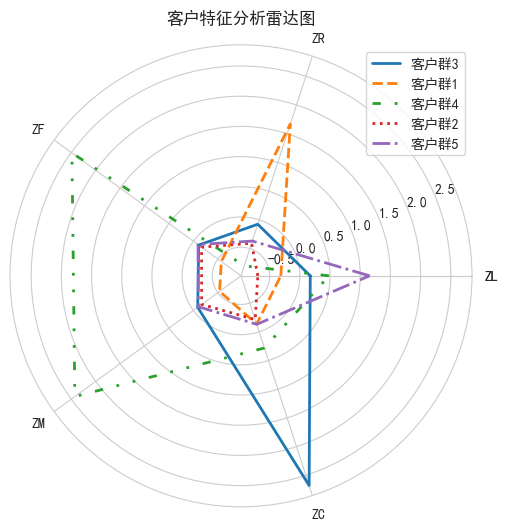

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1234)
# 模型训练
kmeans_fit = kmeans.fit(data)
# 聚类中心
kmeans_cluster = kmeans_fit.cluster_centers_
print('聚类中心为\n',kmeans_fit.cluster_centers_)
# 聚类后样本的类别标签
kmeans_label = kmeans_fit.labels_
print('聚类后样本标签为\n',kmeans_fit.labels_)
# 聚类后各个类别数目
r1 = pd.Series(kmeans_label).value_counts()
print('聚类后各个类别数目\n',r1)
# 输出聚类分群结果
cluster_center = pd.DataFrame(kmeans_cluster,columns=['ZL','ZR','ZF','ZM','ZC'])
cluster_center.index = pd.DataFrame(kmeans_label).drop_duplicates().iloc[:,0]
cluster = pd.concat([r1,cluster_center],axis=1)
# 修改第一列列名
list_column = list(cluster.columns)
list_column[0] = '类别数目'
cluster.columns = list_column

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 客户分群雷达图
labels = ['ZL', 'ZR', 'ZF', 'ZM', 'ZC']
# labels = ['ZL', 'ZR', 'ZF', 'ZM', 'ZC', 'ZL']
legen = ['客户群' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.index)
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
centers = np.array(cluster_center)

# 分割圆周长，并让其闭合
n = len(labels)
# endpoint=False表示一定没有stop
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
print(angle)
# 绘图
fig = plt.figure(figsize = (8,6))
# 以极坐标的形式绘制图形
ax = fig.add_subplot(111, polar=True)
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2,label=kinds[i])
# 添加属性标签
# !为什么多出一个角度
labels = ['ZL', 'ZR', 'ZF', 'ZM', 'ZC', 'ZL']
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()


### 代码6
比较不同聚类算法的聚类效果

假设我们要比较 K-Means 和 DBSCAN 两种聚类算法在同一数据集上的聚类效果。我们可以按照以下步骤进行比较：

对数据集进行预处理和标准化（例如：缺失值填充、特征标准化等）。
使用 K-Means 算法和 DBSCAN 算法对数据集进行聚类，设置相同的聚类数量。
比较两种算法得到的聚类中心和类别标签是否相似。
使用内部评价指标（例如轮廓系数、Calinski-Harabasz指数等）和外部评价指标（例如NMI、ARI等）对聚类结果进行评估和比较，选择聚类效果更好的算法。

最终，我们可以得出结论：哪种算法更适合这个数据集，并给出理由。同时，我们还可以尝试使用其他聚类算法进行比较，以获取更全面的结果。

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# 读取标准化后的数据
data = np.load('./tmp/airline_scale.npz')['arr_0']

# KMeans聚类
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans_fit = kmeans.fit(data)
kmeans_label = kmeans_fit.labels_
kmeans_score = silhouette_score(data, kmeans_label)
print('KMeans聚类效果Silhouette Score为：', kmeans_score)



KMeans聚类效果Silhouette Score为： 0.28141352962336247


In [15]:
# 层次聚类
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_fit = hierarchical.fit(data)
hierarchical_label = hierarchical_fit.labels_
hierarchical_score = silhouette_score(data, hierarchical_label)
print('层次聚类效果Silhouette Score为：', hierarchical_score)



MemoryError: Unable to allocate 14.5 GiB for an array with shape (1940115486,) and data type float64

In [16]:
# DBSCAN聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_fit = dbscan.fit(data)
dbscan_label = dbscan_fit.labels_
dbscan_score = silhouette_score(data, dbscan_label)
print('DBSCAN聚类效果Silhouette Score为：', dbscan_score)



DBSCAN聚类效果Silhouette Score为： -0.1083557616009828


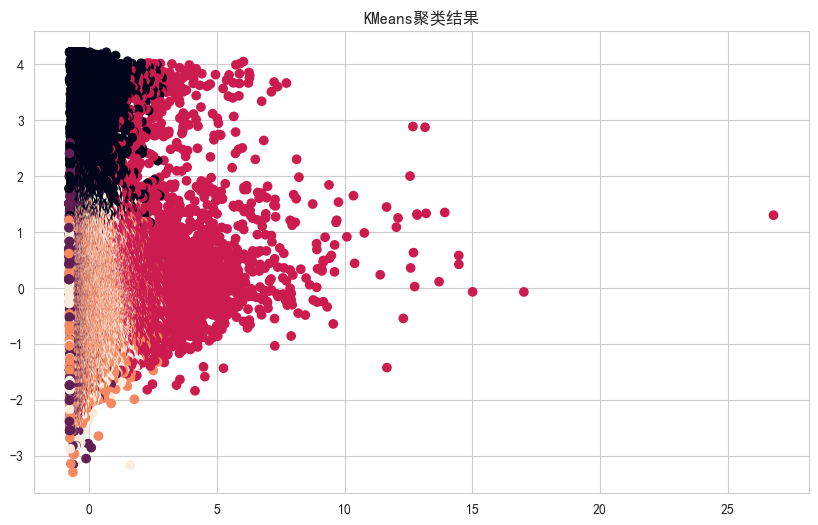

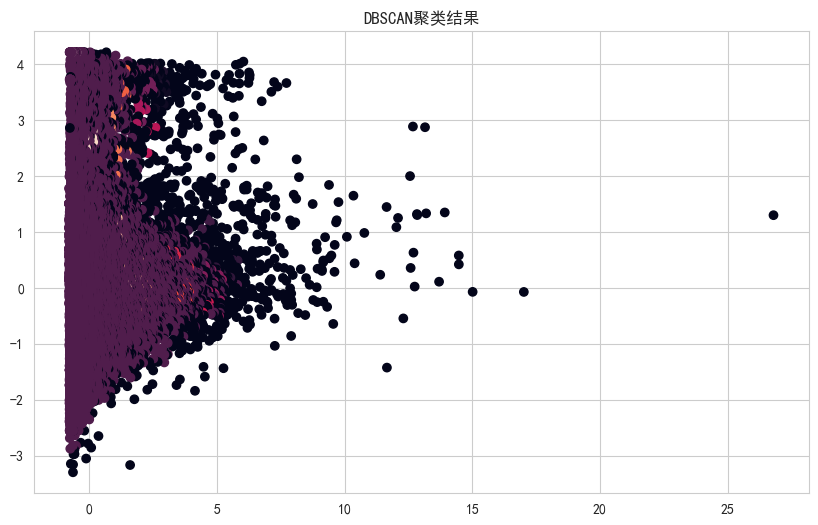

In [17]:
# 绘制聚类结果散点图
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 3], data[:, 4], c=kmeans_label)
plt.title('KMeans聚类结果')
plt.show()

# plt.figure(figsize=(10, 6))
# plt.scatter(data[:, 3], data[:, 4], c=hierarchical_label)
# plt.title('层次聚类结果')
# plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 3], data[:, 4], c=dbscan_label)
plt.title('DBSCAN聚类结果')
plt.show()


In [18]:
from sklearn.cluster import KMeans

# 设置聚类数目
n_clusters = 5

# 构建模型
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)

# 模型训练
kmeans_fit = kmeans.fit(data)

# 聚类中心
kmeans_cluster = kmeans_fit.cluster_centers_
print('聚类中心为\n',kmeans_fit.cluster_centers_)

# 聚类后样本的类别标签
kmeans_label = kmeans_fit.labels_
print('聚类后样本标签为\n',kmeans_fit.labels_)

# 聚类后各个类别数目
r1 = pd.Series(kmeans_label).value_counts()
print('聚类后各个类别数目\n',r1)

# 输出聚类分群结果
cluster_center = pd.DataFrame(kmeans_cluster,columns=['L','R','F','M','C'])
cluster_center.index = pd.DataFrame(kmeans_label).drop_duplicates().iloc[:,0]
cluster = pd.concat([r1,cluster_center],axis=1)

# 修改第一列列名
list_column = list(cluster.columns)
list_column[0] = '类别数目'
cluster.columns = list_column

# 打印聚类结果
print(cluster)


聚类中心为
 [[ 0.17239768 -0.07653448 -0.10853149 -0.08826371  2.67738083]
 [-0.31534097  1.66862478 -0.57213931 -0.53661818 -0.13370665]
 [ 0.48179494 -0.80077025  2.48631009  2.42704902  0.28169782]
 [-0.69616527 -0.4072473  -0.16794198 -0.16961122 -0.21250395]
 [ 1.15354655 -0.36914753 -0.09417919 -0.10304017 -0.12958052]]
聚类后样本标签为
 [2 2 2 ... 3 1 1]
聚类后各个类别数目
 3    25487
4    16129
1    12477
2     5325
0     2874
dtype: int64
    类别数目         L         R         F         M         C
0   2874 -0.315341  1.668625 -0.572139 -0.536618 -0.133707
1  12477 -0.696165 -0.407247 -0.167942 -0.169611 -0.212504
2   5325  0.172398 -0.076534 -0.108531 -0.088264  2.677381
3  25487  0.481795 -0.800770  2.486310  2.427049  0.281698
4  16129  1.153547 -0.369148 -0.094179 -0.103040 -0.129581
